In [1]:
import math
import numpy as np
import ROOT
import array
import matplotlib.pyplot as plt
import pandas as pd

Welcome to JupyROOT 6.28/00


In [2]:
def dati_tdc(fname):
    f = open(fname, "r")
    lines = f.read().split("\n")
    d1 = {}
    num  = 0 
    Events = []
    for i in range(4,len(lines)-4,4):
        event = []
        line1 = lines[i]. split("\t")
        #print(line1)
        line2 = lines[i+1].split("\t")
        line3 = lines[i+2].split("\t")
        line4 = lines[i+3].split("\t")
        col  = [int(line1[0]), int(line2[0]), int(line3[0]), int(line4[0])]
        event.append(col)
        Events.append(col)
        d1[num] = event
        num += 1
    return Events, d1

    

# Common stop

In [3]:
fname = "Misure 15_5"
names  = [1000,1140,830,640,580,480,710,1010,4000,5000,2680,1960,3520,6200,
          3000,8000,9200,19800,30400,25400,15400,11200]
ch_values= []
ch_std = []
ch_err  =[]
for i in names:
    fname1 = fname + "/" +str(i) + "ns.txt"
    Data, d1 = dati_tdc(fname1)
    #print(Data)
    #print(Data)
    ch = [j[3] for j in Data]
    #print(ch)
    ch = np.array(ch)
    mean = np.mean(ch)
    std = np.std(ch)
    ch_values.append(mean)
    ch_std.append(std)
    ch_err.append(std/(math.sqrt(len(ch))))

In [5]:
scale = [250,250,250,250,250,250,250,1000,2500,2500,1000,1000,1000,2500,1000,5000,5000,5000,10000,10000,5000,5000]
err_rit = 1/5 * np.array(scale)
err_rit

array([  50.,   50.,   50.,   50.,   50.,   50.,   50.,  200.,  500.,
        500.,  200.,  200.,  200.,  500.,  200., 1000., 1000., 1000.,
       2000., 2000., 1000., 1000.])

In [6]:
line = ROOT.TF1("f","[0]+ [1]*x")

 FCN=0.481354 FROM MIGRAD    STATUS=CONVERGED      30 CALLS          31 TOTAL
                     EDM=2.26249e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.20024e+01   2.61674e+01   1.09557e-02   8.86821e-09
   2  p1           1.05107e+00   2.38111e-02   9.96921e-06  -8.21556e-05


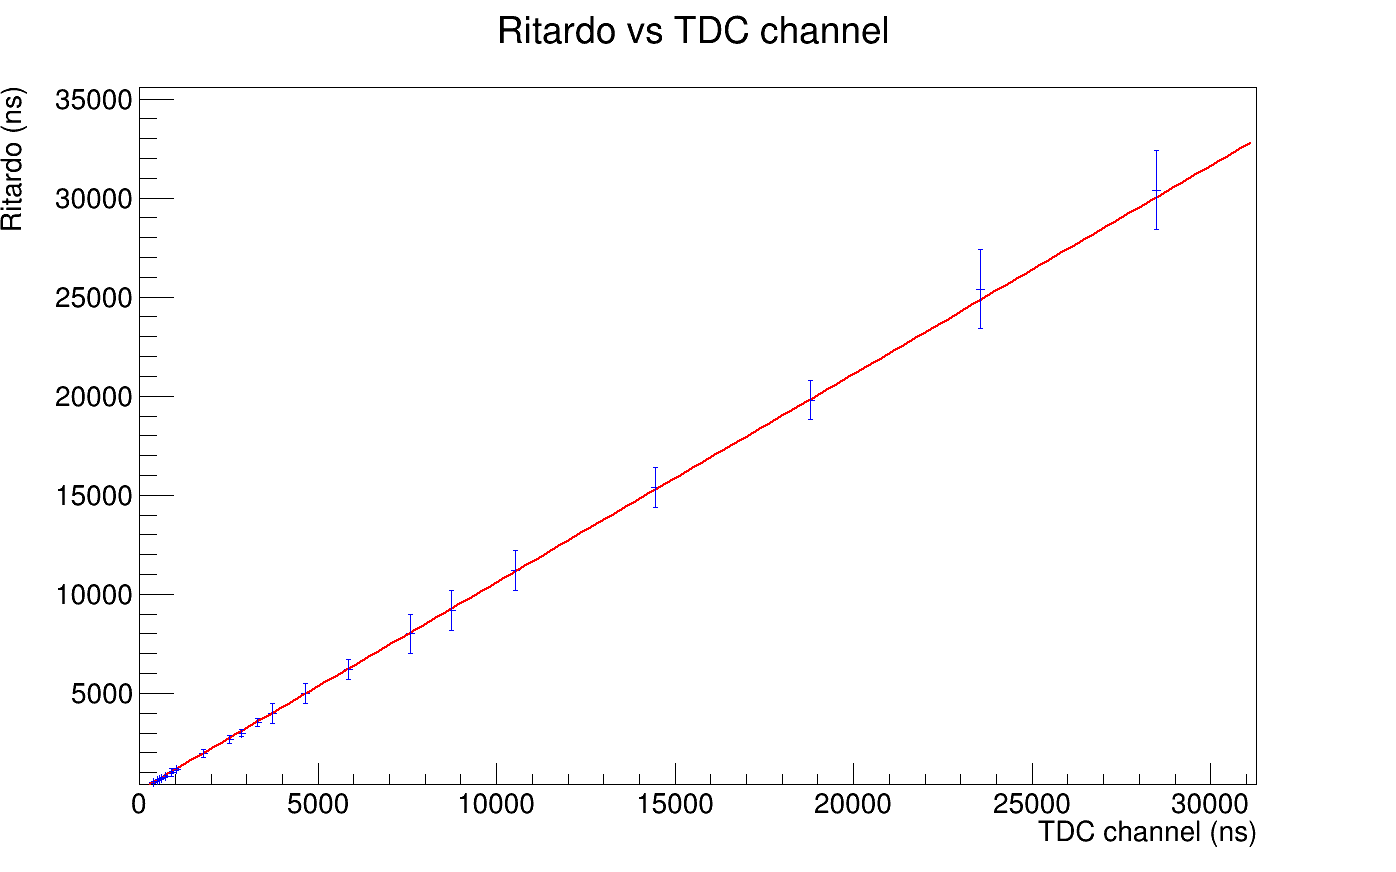

In [23]:
c1 = ROOT.TCanvas("", "",1400, 900)
g1 = ROOT.TGraphErrors(len(names), array.array("f", ch_values), array.array("f", names), 
                      array.array("f", ch_err), array.array("f", err_rit))
g1.SetMarkerStyle(2)
g1.SetTitle("Ritardo vs TDC channel")
g1.SetMarkerColor(4)
g1.SetLineColor(4)
g1.GetXaxis().SetTitle("TDC channel (ns)")
g1.GetYaxis().SetTitle("Ritardo (ns)")
g1.Fit("f")
g1. Draw("AP")
c1.Draw()

$Ax+B$ con
$A = 1.05 \pm 0.02$
$B = 62 \pm 26$


In [25]:
A_stop = 1.05
B_stop  =62
#print(A_stop * 180+ B_stop)
print(A_stop* np.array(ch_values) + B_stop)
print(names)

[ 1004.22121212  1155.425        826.27142857   638.47142857
   576.14642857   471.08214286   700.08928571  1009.56071429
  3979.66666667  4926.48928571  2706.77857143  1936.16428571
  3536.58928571  6207.01785714  3047.66428571  8014.42142857
  9230.45       19803.55357143 29954.50357143 24788.16071429
 15226.57142857 11123.25714286]
[1000, 1140, 830, 640, 580, 480, 710, 1010, 4000, 5000, 2680, 1960, 3520, 6200, 3000, 8000, 9200, 19800, 30400, 25400, 15400, 11200]


# Common START

In [16]:
fname = "common_start_260623"
names_2  = [6800,8100,3900,29600,9200,12000,15200,20000,24800,17200,30400,22400,1680,13400,1700,25600,28800]
ch_values_2= []
ch_std_2 = []
ch_err_2  =[]
for i in names_2:
    fname1 = fname + "/" +str(i) + "ns.txt"
    #print(fname1)
    Data, d1 = dati_tdc(fname1)
    ch = [j[3] for j in Data]
    ch = np.array(ch)
    mean = np.mean(ch)
    std = np.std(ch)
    ch_values_2.append(mean)
    ch_std_2.append(std)
    ch_err_2.append(std/(math.sqrt(len(ch))))

In [17]:
scale_2 = [2500,2500,2500,10000,5000,5000,5000,10000,10000,5000,10000,10000,1000,5000,500,10000,10000]
err_rit_2 = 1/5* np.array(scale)
err_rit_2

array([  50.,   50.,   50.,   50.,   50.,   50.,   50.,  200.,  500.,
        500.,  200.,  200.,  200.,  500.,  200., 1000., 1000., 1000.,
       2000., 2000., 1000., 1000.])

 FCN=8.77725 FROM MIGRAD    STATUS=CONVERGED      24 CALLS          25 TOTAL
                     EDM=5.90475e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.59070e+02   3.39129e+01   2.82376e-02   2.65792e-08
   2  p1           1.04383e+00   2.39815e-03   1.99683e-06  -8.90857e-05


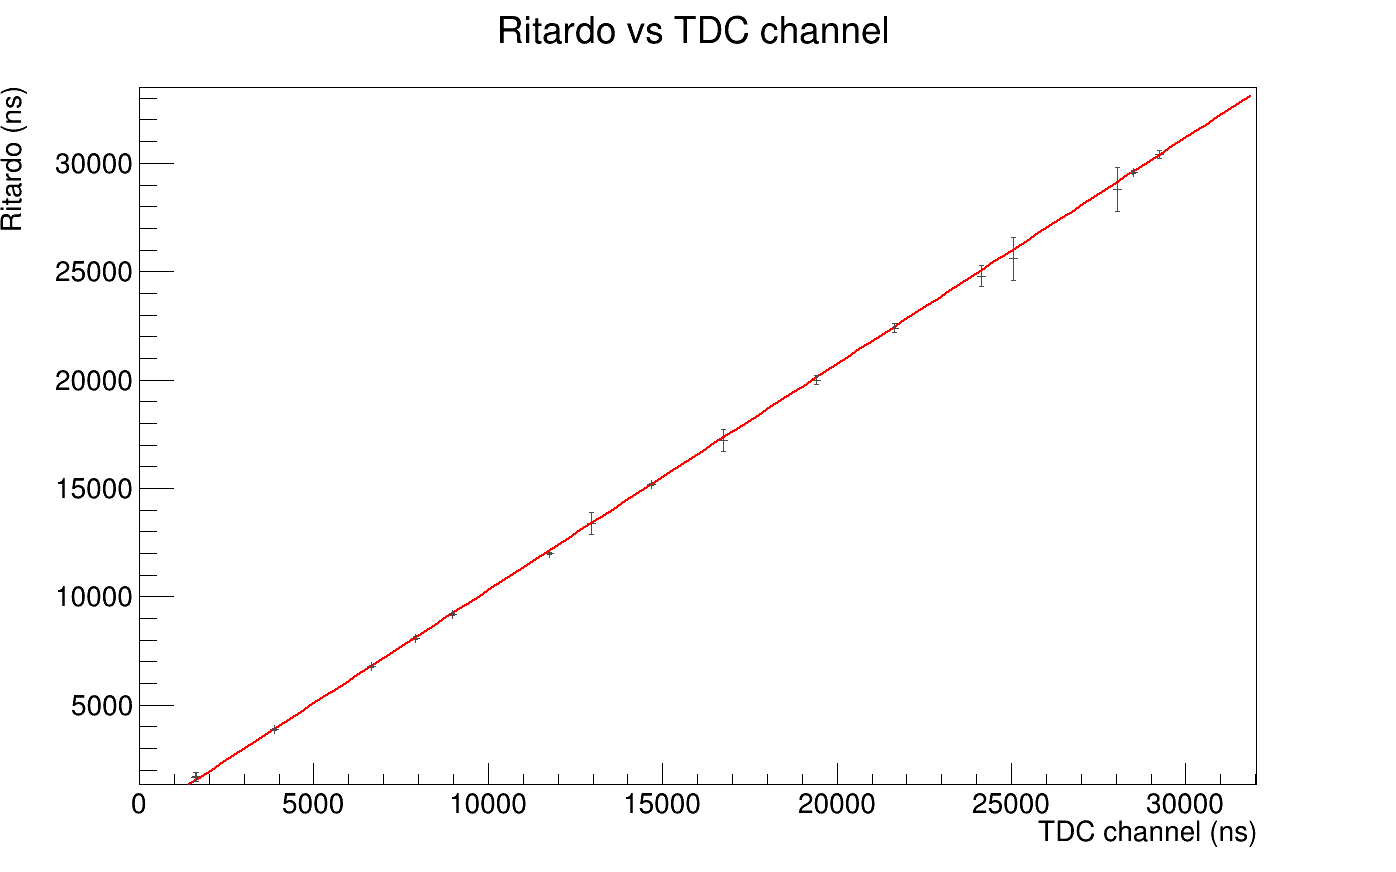

In [18]:
c1 = ROOT.TCanvas("", "",1400, 900)
g1 = ROOT.TGraphErrors(len(names_2), array.array("f", ch_values_2), array.array("f", names_2), 
                      array.array("f", ch_err_2), array.array("f", err_rit_2))
g1.SetMarkerStyle(2)
g1.SetTitle("Ritardo vs TDC channel")
g1.SetMarkerColor(12)
g1.SetLineColor(12)
g1.GetXaxis().SetTitle("TDC channel (ns)")
g1.GetYaxis().SetTitle("Ritardo (ns)")
g1.Fit("f")
g1.Draw("AP")
c1.Draw()

$Ax+B$ con
$A = 1.044 \pm 0.002$
$B = -159 \pm 34$

prova di conversione

In [19]:
A_start = 1.043
B_start = -159
time_values_2 = A_start * np.array(ch_values_2) + B_start 

In [20]:
names_2

[6800,
 8100,
 3900,
 29600,
 9200,
 12000,
 15200,
 20000,
 24800,
 17200,
 30400,
 22400,
 1680,
 13400,
 1700,
 25600,
 28800]

In [21]:
time_values_2

array([ 6763.73866667,  8090.26610101,  3884.34226263, 29551.84532323,
        9201.00842424, 12105.39468687, 15141.85214141, 20086.85210101,
       25009.50657576, 17303.89632323, 30352.31094949, 22403.95550526,
        1524.62324242, 13356.3309596 ,  1553.77456566, 25972.6169899 ,
       29077.65959596])